# Codificación por transformada: ejemplo con rotación de datos

En este ejemplo vamos a simular el proceso de compresión usando una transformación lineal. 
Se parte de datos bidimensionales (altura y peso de distintas personas), y se aplica una 
rotación que alinea los datos con el eje de máxima varianza (PCA o similar). Esto permite 
concentrar la energía en una sola coordenada.

Transformamos los datos originales con una matri de rotación para ajustar los datos para que su energía se concentre en un 
vector de la base. Así, podemos eliminar uno de los vectores de la base (suponiendo que contiene menos energía -> información). Finalente, reconstruimos los datos con un solo vector de la base (en caso de estar en $\mathbb{R}^2$) y calculamos el error.


$$
A = 
\begin{bmatrix}
\cos(\alpha) & \sin(\alpha) \\\\
-\sin(\alpha) & \cos(\alpha)
\end{bmatrix}

\begin{bmatrix}
x_0 \\\\ x_1
\end{bmatrix}
\quad \Rightarrow \quad
\theta = A x
$$

Donde $\theta_0$ contiene la mayor parte de la energía. Si descartamos $\theta_1$, podemos reconstruir una aproximación como sigue. Este proceso reduce los datos a la mitad, con una pérdida de información mínima si 
la segunda coordenada aporta poca varianza.

$$
x \approx A^{-1} 
\begin{bmatrix}
\theta_0 \\\\ 0
\end{bmatrix}
$$

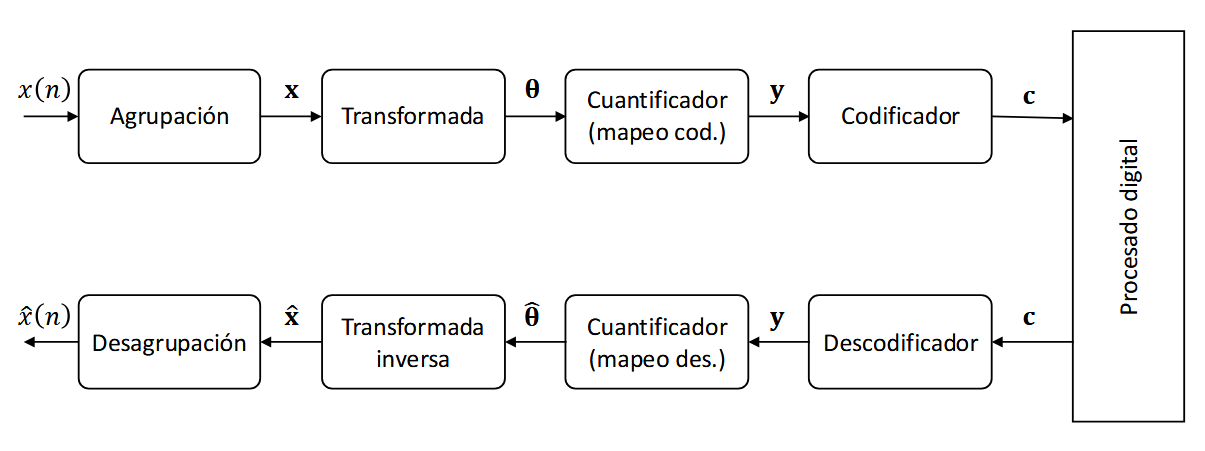

Donde el "suprimir una coordenada" (se puede suprimir si se decide o no se suprime si no se decide) se hace en el codificador, codificando esta información con 0 (cero) bits.


## Transformada de Secuencias Unidimensionales

El objetivo de una transformada lineal unidimensional es representar una secuencia de datos discretos en una nueva base, que permita analizarla, comprimirla o procesarla de forma más eficiente. Dado un vector columna de datos originales $x = [x_0, x_1, \ldots, x_{N-1}]^T$, la transformación consiste en aplicar una matriz $A \in \mathbb{R}^{N \times N}$ que define una nueva base. Esto genera un nuevo vector $\theta$ de coordenadas transformadas:

$$
\theta = A x
$$

Cada elemento de $\theta$ se obtiene como una combinación lineal de los datos originales, ponderados por la fila correspondiente de la matriz $A$. De forma explícita, la componente $\theta_n$ se calcula como:

$$
\theta_n = \sum_{i=0}^{N-1} x_i \, a_{n,i}
$$

donde $a_{n,i}$ es el elemento en la fila $n$, columna $i$ de la matriz $A$.

La operación inversa permite recuperar los datos originales a partir de los coeficientes transformados. Para ello, usamos otra matriz $B \in \mathbb{R}^{N \times N}$, inversa de $A$, de modo que:

$$
x = B \theta
$$

y componente a componente:

$$
x_n = \sum_{i=0}^{N-1} \theta_i \, b_{n,i}
$$

Cuando las matrices $A$ y $B$ son ortogonales, la transformación se simplifica mucho. Si los elementos son reales, entonces la inversa de $A$ es simplemente su transpuesta:

$$
B = A^{-1} = A^T
$$

En el caso de matrices complejas, la inversa es la conjugada transpuesta:

$$
B = A^{-1} = A^H
$$

Una propiedad fundamental de las transformaciones ortogonales es que conservan la energía del vector. Esto significa que la suma de los cuadrados de los datos originales es igual a la suma de los cuadrados de los coeficientes transformados:

$$
\sum_{i=0}^{N-1} \theta_i^2 = \theta^T \theta = x^T A^T A x = x^T x = \sum_{n=0}^{N-1} x_n^2
$$

Esta propiedad es crucial en aplicaciones como la compresión de datos o la representación eficiente de señales, ya que garantiza que no se pierde energía en el proceso de transformación.

___

## Transformada de Secuencias Bidimensionales

Cuando se trabaja con señales bidimensionales, como imágenes, los datos se representan como una matriz $X \in \mathbb{R}^{N \times N}$. En este contexto, se quiere aplicar una transformación bidimensional para expresar la información en una nueva base que permita, por ejemplo, comprimirla o identificar patrones.

La forma más general de la transformación bidimensional consiste en aplicar una base general $a_{i,j,k,\ell}$, de modo que el coeficiente transformado $\theta_{k,\ell}$ se calcule como:

$$
\theta_{k,\ell} = \sum_{i=0}^{N-1} \sum_{j=0}^{N-1} x_{i,j} \, a_{i,j,k,\ell}
$$

Sin embargo, para simplificar la implementación y el análisis, se suele asumir que la transformación es separable, es decir, que puede aplicarse primero a las filas y luego a las columnas, o viceversa. En ese caso, el cálculo se reorganiza como:

$$
\theta_{k,\ell} = \sum_{i=0}^{N-1} \sum_{j=0}^{N-1} a_{k,i} \, x_{i,j} \, a_{j,\ell}
$$

Este enfoque permite escribir la transformación en forma matricial. Si $A$ es la matriz de transformación unidimensional, la transformación bidimensional directa se expresa como:

$$
\Theta = A X A^T
$$

Primero se transforman las filas de $X$ (izquierda) y luego las columnas del resultado (derecha). La operación inversa se realiza aplicando las matrices inversas de forma análoga:

$$
X = B \Theta B^T
$$

Cuando $A$ es ortogonal, su inversa es la transpuesta y se obtiene:

$$
X = A^T \Theta A
$$

Esta forma de transformación es extremadamente eficiente y ampliamente usada en procesamiento digital de imágenes (por ejemplo, en la DCT de JPEG), ya que permite concentrar la mayor parte de la energía de una imagen en un número reducido de coeficientes transformados, facilitando la compresión sin pérdidas visuales significativas.

---

## Ganancia de codificación

La ganancia de codificación mide la capacidad de una transformada para compactar la energía de una señal en pocos coeficientes. Su valor indica cuán eficiente puede ser la compresión: si la mayor parte de la energía se concentra en unos pocos valores transformados, es posible descartar muchos coeficientes sin perder apenas información.

Esta ganancia se calcula como el cociente entre la media aritmética de las varianzas de los coeficientes transformados y su media geométrica. La expresión matemática es:

$$
G_{TC} = \frac{\frac{1}{N} \sum_{k=0}^{N-1} \sigma^2_{\theta_k}}{\left( \prod_{k=0}^{N-1} \sigma^2_{\theta_k} \right)^{1/N}}
$$

También puede escribirse en función de la varianza de la señal original $\sigma_x^2$ como:

$$
G_{TC} = \frac{\sigma_x^2}{\left( \prod_{k=0}^{N-1} \sigma^2_{\theta_k} \right)^{1/N}}
$$

Cuando todas las varianzas son iguales, la ganancia es 1, lo que indica que la transformada no mejora la codificación. En cambio, una ganancia mayor que 1 implica que la energía está más concentrada, lo que permite una representación más eficiente de la señal. Este valor depende de la naturaleza estadística de la señal, del tamaño del bloque $N$ y de la transformada utilizada.

___

## Transformada Discreta del Coseno (DCT)

La DCT es una transformada ortogonal que permite representar una señal real como una suma de funciones coseno de distintas frecuencias. Su principal virtud es que consigue concentrar la mayor parte de la energía de la señal en los primeros coeficientes, lo que la hace ideal para compresión.

La matriz de transformación $C$ se define como:

$$
C[n, k] = \sqrt{\frac{a_n}{N}} \cos\left( \frac{(2k + 1)n\pi}{2N} \right), \quad n,k = 0,\dots,N-1
$$

donde:

$$
a_n =
\begin{cases}
1, & n = 0 \\
2, & n > 0
\end{cases}
$$

La DCT es ortogonal, por lo que su inversa es simplemente la transpuesta:

$$
C^{-1} = C^T
$$

La transformada directa se expresa como $\theta = Cx$ y la inversa como $x = C^T \theta$.

En el caso bidimensional (por ejemplo en imágenes), si $X$ es un bloque $N \times N$, la DCT se aplica como:

$$
\Theta = C X C^T \quad \text{y} \quad X = C^T \Theta C
$$

### Comparación con la DFT

La DCT y la DFT están relacionadas pero tienen diferencias importantes:

- La DFT asume que la señal es periódica, lo que puede introducir discontinuidades en los bordes.
- La DCT asume que la señal es simétrica (reflejada en espejo), evitando discontinuidades.

Esto permite a la DCT concentrar la energía en coeficientes de baja frecuencia, lo que mejora la compresión.

La DCT es ampliamente utilizada en compresión de imágenes (JPEG), audio (MP3), y video (MPEG).
